In [13]:
# Codigo Pratico do Card - 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
# Carregamento do dataset
titanic = sns.load_dataset('titanic')

In [15]:
# Visualização inicial dos dados
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# Limpeza básica dos dados
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

/tmp/ipykernel_3672/2249876562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/tmp/ipykernel_3672/2249876562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [17]:
# Mean, Median and Mode

titanic.mean(numeric_only=True)
titanic.median(numeric_only=True)

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [18]:
# Moda da idade
titanic['age'].value_counts().head(1)

# Moda da tarifa
titanic['fare'].value_counts().head(1)

# Variation and Standard Deviation

titanic['age'].var() # variancia da idade

titanic['age'].std() # desvio padrao da idade

titanic['fare'].var() # variancia da tarifa

titanic['fare'].std() # desvio padrao da tarifa

49.693428597180905

In [19]:
# Percentiles and Moments

age = titanic['age'].values
fare = titanic['fare'].values

np.percentile(age, 25)

np.percentile(age, 50)

np.percentile(age, 75)

np.mean(age)

np.var(age)

stats.skew(age)

stats.kurtosis(age)


np.float64(0.9815760369363544)

In [20]:
# Para tarifa
np.percentile(fare, 25)

np.percentile(fare, 50)

np.percentile(fare, 75)

np.mean(fare)

np.var(fare)

stats.skew(fare)

stats.kurtosis(fare)

np.float64(33.20428925264474)

Text(0, 0.5, 'Frequencia')

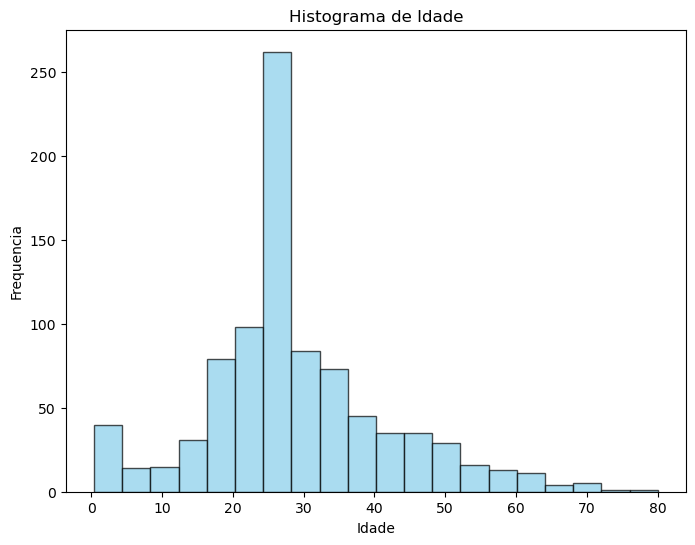

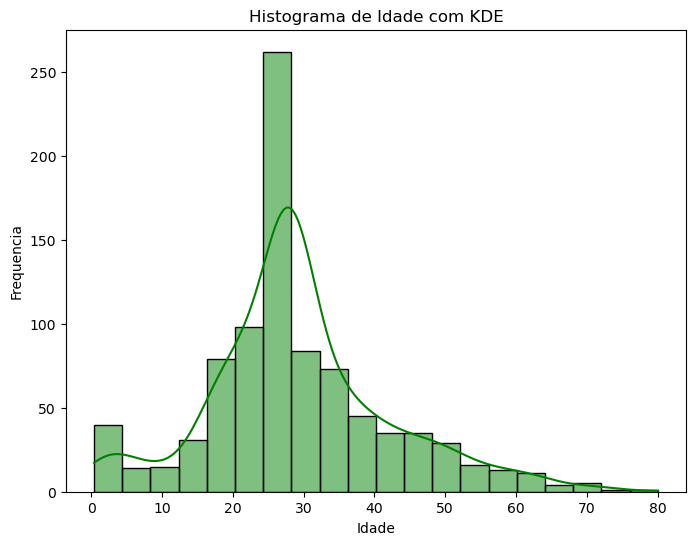

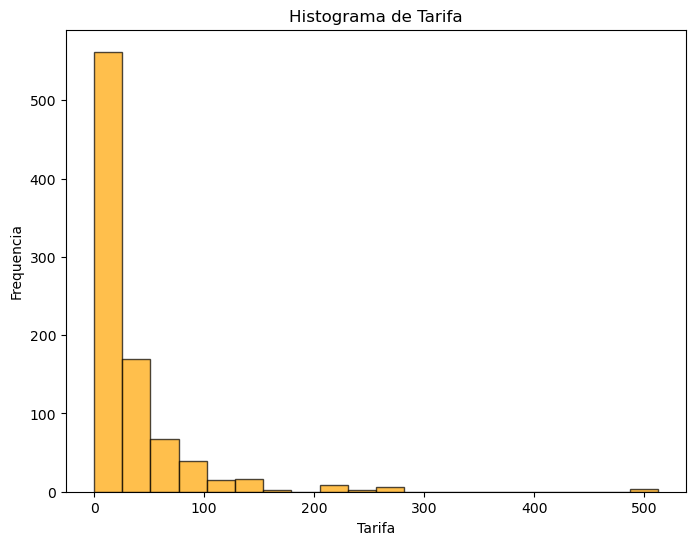

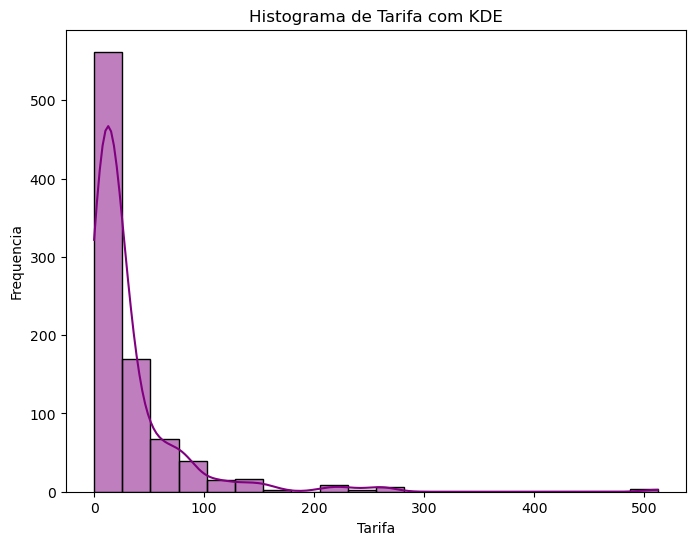

In [21]:
# Visualizacoes

plt.figure(figsize=(8,6))
plt.hist(age, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histograma de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequencia")

plt.figure(figsize=(8,6))
sns.histplot(age, kde=True, bins=20, color='green')
plt.title("Histograma de Idade com KDE")
plt.xlabel("Idade")
plt.ylabel("Frequencia")

plt.figure(figsize=(8,6))
plt.hist(fare, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Histograma de Tarifa")
plt.xlabel("Tarifa")
plt.ylabel("Frequencia")

plt.figure(figsize=(8,6))
sns.histplot(fare, kde=True, bins=20, color='purple')
plt.title("Histograma de Tarifa com KDE")
plt.xlabel("Tarifa")
plt.ylabel("Frequencia")

In [22]:
# Covariance and Correlation

cov = np.cov(age, fare)[0,1] # covariancia
cov

np.corrcoef(age, fare)[0,1] # correlacao


np.float64(0.09668842218036484)

In [23]:
# Conditional Probability
# Probabilidade de sobrevivencia dado que o passageiro e mulher

mulheres = titanic[titanic['sex'] == 'female'] # filtra para mulheres
total_mulheres = len(mulheres)

In [25]:
# Numero de mulheres que sobreviveram
num_mulheres_sobreviventes = len(mulheres[mulheres['survived'] == 1])

In [26]:
# Calculo da probabilidade condicional P(sobrevivencia | mulher)
prob_condicional = num_mulheres_sobreviventes / total_mulheres if total_mulheres > 0 else 0
prob_condicional


0.7420382165605095

In [27]:
# Probabilidade de sobrevivencia dado que o passageiro e homem
homens = titanic[titanic['sex'] == 'male']
total_homens = len(homens)
num_homens_sobreviventes = len(homens[homens['survived'] == 1])
prob_homens = num_homens_sobreviventes / total_homens if total_homens > 0 else 0
prob_homens


0.18890814558058924

In [28]:
# Probabilidade de sobrevivencia por classe
primeira_classe = titanic[titanic['class'] == 'First']
sobreviventes_primeira = len(primeira_classe[primeira_classe['survived'] == 1])
prob_primeira = sobreviventes_primeira / len(primeira_classe)
prob_primeira

segunda_classe = titanic[titanic['class'] == 'Second']
sobreviventes_segunda = len(segunda_classe[segunda_classe['survived'] == 1])
prob_segunda = sobreviventes_segunda / len(segunda_classe)
prob_segunda

terceira_classe = titanic[titanic['class'] == 'Third']
sobreviventes_terceira = len(terceira_classe[terceira_classe['survived'] == 1])
prob_terceira = sobreviventes_terceira / len(terceira_classe)
prob_terceira


0.24236252545824846

/tmp/ipykernel_3672/2130360899.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare'].mean()
/tmp/ipykernel_3672/2130360899.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare'].median()


Text(0.5, 1.0, 'Taxa de Sobrevivencia por Sexo')

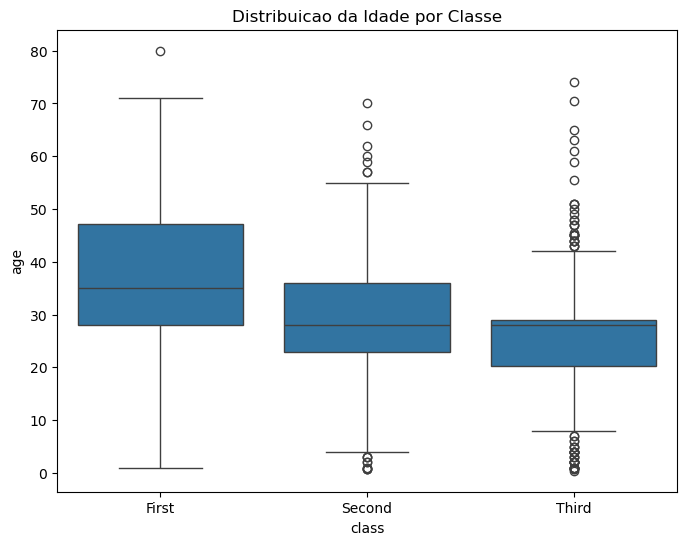

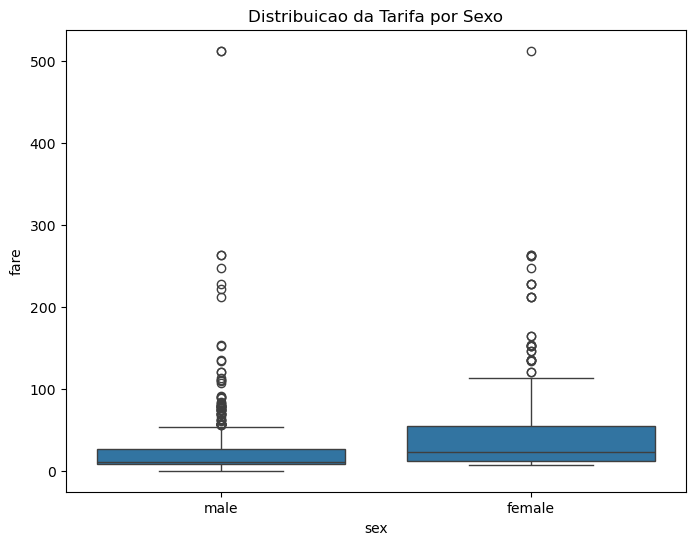

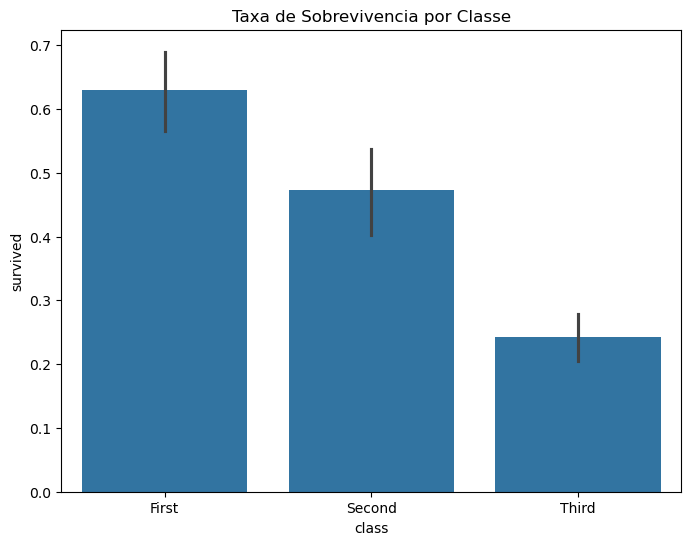

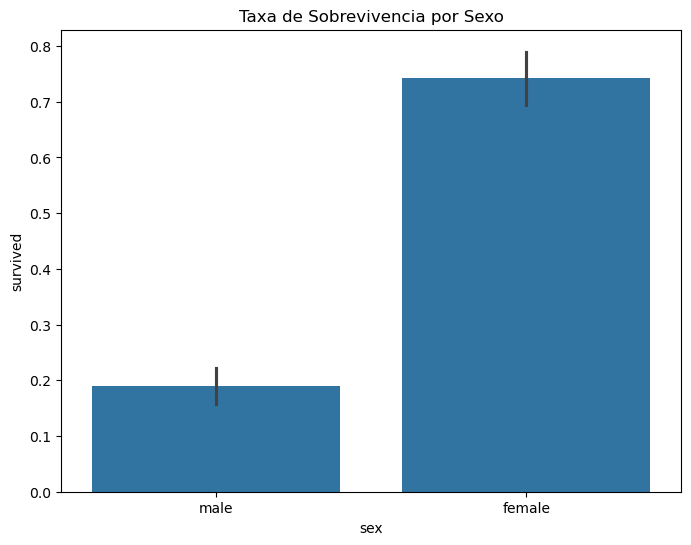

In [29]:
# Analise por grupos

# Idade media por sexo
titanic.groupby('sex')['age'].mean()

# Idade mediana por sexo
titanic.groupby('sex')['age'].median()

# Tarifa media por classe
titanic.groupby('class')['fare'].mean()

# Tarifa mediana por classe
titanic.groupby('class')['fare'].median()

# Visualizacoes por grupos

plt.figure(figsize=(8,6))
sns.boxplot(data=titanic, x='class', y='age')
plt.title("Distribuicao da Idade por Classe")

plt.figure(figsize=(8,6))
sns.boxplot(data=titanic, x='sex', y='fare')
plt.title("Distribuicao da Tarifa por Sexo")

plt.figure(figsize=(8,6))
sns.barplot(data=titanic, x='class', y='survived')
plt.title("Taxa de Sobrevivencia por Classe")

plt.figure(figsize=(8,6))
sns.barplot(data=titanic, x='sex', y='survived')
plt.title("Taxa de Sobrevivencia por Sexo")